In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join("all_files.csv"))
df.head()

,time,Unnamed: 1,Unnamed: 2,latitude,longitude,depth,mag,magType,nst,gap,...,VEI,Lat_Eruption,Lon_Eruption,Lat_Dif,Lon_dif,distance_km,Date_Dif,Deaths,Injuries,Damage (Mil)
0,2002-08-19T15:03:23.600Z,8/19/2002,T15:03:23.600Z,37.697,14.967,5.0,2.8,md,9.0,NaN,...,3,37.734,15.004,0.037,0.037,5.246,9,0,32,0
1,2002-08-19T14:57:59.700Z,8/19/2002,T14:57:59.700Z,37.721,14.963,5.0,2.7,md,8.0,NaN,...,3,37.734,15.004,0.013,0.041,3.885,9,0,32,0
2,2002-08-19T12:05:21.700Z,8/19/2002,T12:05:21.700Z,37.708,14.965,5.0,2.8,md,10.0,NaN,...,3,37.734,15.004,0.026,0.039,4.486,9,0,32,0
3,2002-08-13T05:29:43.300Z,8/13/2002,T05:29:43.300Z,37.842,14.667,5.0,3.2,md,18.0,NaN,...,3,37.734,15.004,0.108,0.337,31.956,15,0,32,0
4,2002-08-13T02:35:50.000Z,8/13/2002,T02:35:50.000Z,37.840,14.662,5.0,2.5,md,5.0,NaN,...,3,37.734,15.004,0.106,0.342,32.282,15,0,32,0


In [6]:
target = df["VEI"]
target_names = ["0","1","2","3","4","5","6"]

In [7]:
data = df[['depth','mag','distance_km','Date_Dif']]
feature_names = data.columns
data.head()

,depth,mag,distance_km,Date_Dif
0,5.0,2.8,5.246,9
1,5.0,2.7,3.885,9
2,5.0,2.8,4.486,9
3,5.0,3.2,31.956,15
4,5.0,2.5,32.282,15


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.33, random_state=42)

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8879668049792531

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8983402489626556

In [15]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.38257703176498653, 'distance_km'),
 (0.308440740820298, 'depth'),
 (0.15581402081419032, 'mag'),
 (0.15316820660052521, 'Date_Dif')]

[Text(83.68979865444618, 213.0912, 'X[2] <= 3.143\ngini = 0.624\nsamples = 976\nvalue = [144, 12, 2, 250, 13, 523, 32]'),
 Text(16.713884555382215, 204.3936, 'X[1] <= 2.505\ngini = 0.032\nsamples = 501\nvalue = [0, 0, 0, 6, 0, 493, 2]'),
 Text(8.356942277691108, 195.696, 'X[0] <= 4.686\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 3, 0, 2, 0]'),
 Text(4.178471138845554, 186.9984, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0]'),
 Text(12.535413416536661, 186.9984, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0, 0, 0]'),
 Text(25.070826833073323, 195.696, 'X[0] <= 7.657\ngini = 0.02\nsamples = 496\nvalue = [0, 0, 0, 3, 0, 491, 2]'),
 Text(20.892355694227767, 186.9984, 'gini = 0.0\nsamples = 475\nvalue = [0, 0, 0, 0, 0, 475, 0]'),
 Text(29.249297971918878, 186.9984, 'X[0] <= 10.004\ngini = 0.39\nsamples = 21\nvalue = [0, 0, 0, 3, 0, 16, 2]'),
 Text(20.892355694227767, 178.3008, 'X[0] <= 9.05\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 1, 0, 0, 2]'),
 Text(16.713884555382215, 

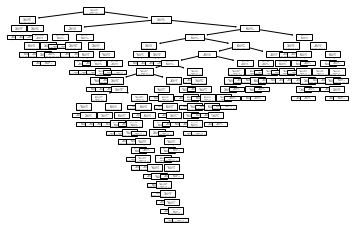

In [16]:
tree.plot_tree(clf)

In [31]:
import graphviz
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("VEI_Tree")

'VEI_Tree.pdf'

[Text(83.68979865444618, 213.0912, 'X[2] <= 3.143\ngini = 0.624\nsamples = 976\nvalue = [144, 12, 2, 250, 13, 523, 32]'),
 Text(16.713884555382215, 204.3936, 'X[1] <= 2.505\ngini = 0.032\nsamples = 501\nvalue = [0, 0, 0, 6, 0, 493, 2]'),
 Text(8.356942277691108, 195.696, 'X[0] <= 4.686\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 3, 0, 2, 0]'),
 Text(4.178471138845554, 186.9984, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0]'),
 Text(12.535413416536661, 186.9984, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0, 0, 0]'),
 Text(25.070826833073323, 195.696, 'X[0] <= 7.657\ngini = 0.02\nsamples = 496\nvalue = [0, 0, 0, 3, 0, 491, 2]'),
 Text(20.892355694227767, 186.9984, 'gini = 0.0\nsamples = 475\nvalue = [0, 0, 0, 0, 0, 475, 0]'),
 Text(29.249297971918878, 186.9984, 'X[0] <= 10.004\ngini = 0.39\nsamples = 21\nvalue = [0, 0, 0, 3, 0, 16, 2]'),
 Text(20.892355694227767, 178.3008, 'X[0] <= 9.05\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 1, 0, 0, 2]'),
 Text(16.713884555382215, 

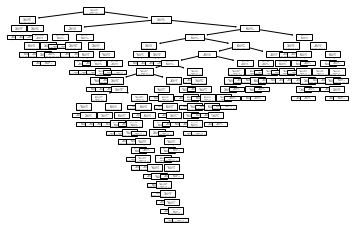

In [37]:
tree.plot_tree(clf)

In [45]:
plt.figure(figsize=(200,200))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()
plt.savefig("ML_Tree.png")

<Figure size 432x288 with 0 Axes>

In [36]:
tree.export_graphviz(clf, out_file=dot_data) 

FileNotFoundError: [Errno 2] No such file or directory: 'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 3.143\\ngini = 0.624\\nsamples = 976\\nvalue = [144, 12, 2, 250, 13, 523, 32]"] ;\n1 [label="X[1] <= 2.505\\ngini = 0.032\\nsamples = 501\\nvalue = [0, 0, 0, 6, 0, 493, 2]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 4.686\\ngini = 0.48\\nsamples = 5\\nvalue = [0, 0, 0, 3, 0, 2, 0]"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 0, 0, 2, 0]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 0, 3, 0, 0, 0]"] ;\n2 -> 4 ;\n5 [label="X[0] <= 7.657\\ngini = 0.02\\nsamples = 496\\nvalue = [0, 0, 0, 3, 0, 491, 2]"] ;\n1 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 475\\nvalue = [0, 0, 0, 0, 0, 475, 0]"] ;\n5 -> 6 ;\n7 [label="X[0] <= 10.004\\ngini = 0.39\\nsamples = 21\\nvalue = [0, 0, 0, 3, 0, 16, 2]"] ;\n5 -> 7 ;\n8 [label="X[0] <= 9.05\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 0, 0, 1, 0, 0, 2]"] ;\n7 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 0, 0, 0, 2]"] ;\n8 -> 10 ;\n11 [label="X[1] <= 3.15\\ngini = 0.198\\nsamples = 18\\nvalue = [0, 0, 0, 2, 0, 16, 0]"] ;\n7 -> 11 ;\n12 [label="X[0] <= 15.766\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 0, 0, 2, 0, 1, 0]"] ;\n11 -> 12 ;\n13 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 2, 0, 0, 0]"] ;\n12 -> 13 ;\n14 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 1, 0]"] ;\n12 -> 14 ;\n15 [label="gini = 0.0\\nsamples = 15\\nvalue = [0, 0, 0, 0, 0, 15, 0]"] ;\n11 -> 15 ;\n16 [label="X[1] <= 3.55\\ngini = 0.635\\nsamples = 475\\nvalue = [144, 12, 2, 244, 13, 30, 30]"] ;\n0 -> 16 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n17 [label="X[0] <= 1.66\\ngini = 0.21\\nsamples = 192\\nvalue = [8, 0, 0, 170, 1, 13, 0]"] ;\n16 -> 17 ;\n18 [label="X[2] <= 21.917\\ngini = 0.165\\nsamples = 11\\nvalue = [1, 0, 0, 0, 0, 10, 0]"] ;\n17 -> 18 ;\n19 [label="gini = 0.0\\nsamples = 10\\nvalue = [0, 0, 0, 0, 0, 10, 0]"] ;\n18 -> 19 ;\n20 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0, 0, 0, 0, 0, 0]"] ;\n18 -> 20 ;\n21 [label="X[3] <= 3.5\\ngini = 0.116\\nsamples = 181\\nvalue = [7, 0, 0, 170, 1, 3, 0]"] ;\n17 -> 21 ;\n22 [label="X[2] <= 31.634\\ngini = 0.013\\nsamples = 153\\nvalue = [1, 0, 0, 152, 0, 0, 0]"] ;\n21 -> 22 ;\n23 [label="gini = 0.0\\nsamples = 152\\nvalue = [0, 0, 0, 152, 0, 0, 0]"] ;\n22 -> 23 ;\n24 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0, 0, 0, 0, 0, 0]"] ;\n22 -> 24 ;\n25 [label="X[0] <= 7.011\\ngini = 0.528\\nsamples = 28\\nvalue = [6, 0, 0, 18, 1, 3, 0]"] ;\n21 -> 25 ;\n26 [label="X[2] <= 4.309\\ngini = 0.124\\nsamples = 15\\nvalue = [1, 0, 0, 14, 0, 0, 0]"] ;\n25 -> 26 ;\n27 [label="X[0] <= 3.505\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 0, 0, 1, 0, 0, 0]"] ;\n26 -> 27 ;\n28 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0, 0, 0, 0, 0, 0]"] ;\n27 -> 28 ;\n29 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n27 -> 29 ;\n30 [label="gini = 0.0\\nsamples = 13\\nvalue = [0, 0, 0, 13, 0, 0, 0]"] ;\n26 -> 30 ;\n31 [label="X[2] <= 32.387\\ngini = 0.698\\nsamples = 13\\nvalue = [5, 0, 0, 4, 1, 3, 0]"] ;\n25 -> 31 ;\n32 [label="X[2] <= 6.445\\ngini = 0.469\\nsamples = 8\\nvalue = [5, 0, 0, 0, 0, 3, 0]"] ;\n31 -> 32 ;\n33 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 0, 0, 2, 0]"] ;\n32 -> 33 ;\n34 [label="X[2] <= 14.949\\ngini = 0.278\\nsamples = 6\\nvalue = [5, 0, 0, 0, 0, 1, 0]"] ;\n32 -> 34 ;\n35 [label="X[2] <= 9.602\\ngini = 0.444\\nsamples = 3\\nvalue = [2, 0, 0, 0, 0, 1, 0]"] ;\n34 -> 35 ;\n36 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0, 0, 0, 0, 0]"] ;\n35 -> 36 ;\n37 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 1, 0]"] ;\n35 -> 37 ;\n38 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0, 0, 0, 0, 0, 0]"] ;\n34 -> 38 ;\n39 [label="X[1] <= 3.25\\ngini = 0.32\\nsamples = 5\\nvalue = [0, 0, 0, 4, 1, 0, 0]"] ;\n31 -> 39 ;\n40 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 0, 0, 4, 0, 0, 0]"] ;\n39 -> 40 ;\n41 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 1, 0, 0]"] ;\n39 -> 41 ;\n42 [label="X[3] <= 3.5\\ngini = 0.682\\nsamples = 283\\nvalue = [136, 12, 2, 74, 12, 17, 30]"] ;\n16 -> 42 ;\n43 [label="X[0] <= 8.45\\ngini = 0.589\\nsamples = 222\\nvalue = [133, 6, 1, 40, 11, 3, 28]"] ;\n42 -> 43 ;\n44 [label="X[3] <= 0.5\\ngini = 0.42\\nsamples = 23\\nvalue = [0, 0, 0, 17, 3, 3, 0]"] ;\n43 -> 44 ;\n45 [label="X[2] <= 9.331\\ngini = 0.48\\nsamples = 5\\nvalue = [0, 0, 0, 0, 3, 2, 0]"] ;\n44 -> 45 ;\n46 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 0, 0, 2, 0]"] ;\n45 -> 46 ;\n47 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 0, 0, 3, 0, 0]"] ;\n45 -> 47 ;\n48 [label="X[0] <= 1.151\\ngini = 0.105\\nsamples = 18\\nvalue = [0, 0, 0, 17, 0, 1, 0]"] ;\n44 -> 48 ;\n49 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 1, 0]"] ;\n48 -> 49 ;\n50 [label="gini = 0.0\\nsamples = 17\\nvalue = [0, 0, 0, 17, 0, 0, 0]"] ;\n48 -> 50 ;\n51 [label="X[0] <= 10.45\\ngini = 0.518\\nsamples = 199\\nvalue = [133, 6, 1, 23, 8, 0, 28]"] ;\n43 -> 51 ;\n52 [label="X[3] <= 1.5\\ngini = 0.439\\nsamples = 182\\nvalue = [133, 6, 0, 13, 4, 0, 26]"] ;\n51 -> 52 ;\n53 [label="X[1] <= 4.95\\ngini = 0.563\\nsamples = 112\\nvalue = [69, 3, 0, 13, 4, 0, 23]"] ;\n52 -> 53 ;\n54 [label="X[2] <= 28.72\\ngini = 0.511\\nsamples = 98\\nvalue = [66, 3, 0, 11, 4, 0, 14]"] ;\n53 -> 54 ;\n55 [label="X[2] <= 6.698\\ngini = 0.41\\nsamples = 81\\nvalue = [61, 1, 0, 9, 2, 0, 8]"] ;\n54 -> 55 ;\n56 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 2, 0, 0, 0]"] ;\n55 -> 56 ;\n57 [label="X[2] <= 16.822\\ngini = 0.385\\nsamples = 79\\nvalue = [61, 1, 0, 7, 2, 0, 8]"] ;\n55 -> 57 ;\n58 [label="X[2] <= 8.161\\ngini = 0.188\\nsamples = 39\\nvalue = [35, 0, 0, 3, 0, 0, 1]"] ;\n57 -> 58 ;\n59 [label="X[2] <= 7.189\\ngini = 0.625\\nsamples = 4\\nvalue = [2, 0, 0, 1, 0, 0, 1]"] ;\n58 -> 59 ;\n60 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0, 0, 0, 0, 0]"] ;\n59 -> 60 ;\n61 [label="X[3] <= 0.5\\ngini = 0.5\\nsamples = 2\\nvalue = [0, 0, 0, 1, 0, 0, 1]"] ;\n59 -> 61 ;\n62 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n61 -> 62 ;\n63 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n61 -> 63 ;\n64 [label="X[1] <= 3.7\\ngini = 0.108\\nsamples = 35\\nvalue = [33, 0, 0, 2, 0, 0, 0]"] ;\n58 -> 64 ;\n65 [label="X[2] <= 13.813\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 0, 0, 1, 0, 0, 0]"] ;\n64 -> 65 ;\n66 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n65 -> 66 ;\n67 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0, 0, 0, 0, 0, 0]"] ;\n65 -> 67 ;\n68 [label="X[2] <= 9.912\\ngini = 0.059\\nsamples = 33\\nvalue = [32, 0, 0, 1, 0, 0, 0]"] ;\n64 -> 68 ;\n69 [label="X[2] <= 9.746\\ngini = 0.245\\nsamples = 7\\nvalue = [6, 0, 0, 1, 0, 0, 0]"] ;\n68 -> 69 ;\n70 [label="gini = 0.0\\nsamples = 6\\nvalue = [6, 0, 0, 0, 0, 0, 0]"] ;\n69 -> 70 ;\n71 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n69 -> 71 ;\n72 [label="gini = 0.0\\nsamples = 26\\nvalue = [26, 0, 0, 0, 0, 0, 0]"] ;\n68 -> 72 ;\n73 [label="X[2] <= 17.236\\ngini = 0.534\\nsamples = 40\\nvalue = [26, 1, 0, 4, 2, 0, 7]"] ;\n57 -> 73 ;\n74 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n73 -> 74 ;\n75 [label="X[1] <= 4.05\\ngini = 0.514\\nsamples = 39\\nvalue = [26, 1, 0, 3, 2, 0, 7]"] ;\n73 -> 75 ;\n76 [label="gini = 0.0\\nsamples = 5\\nvalue = [5, 0, 0, 0, 0, 0, 0]"] ;\n75 -> 76 ;\n77 [label="X[1] <= 4.35\\ngini = 0.564\\nsamples = 34\\nvalue = [21, 1, 0, 3, 2, 0, 7]"] ;\n75 -> 77 ;\n78 [label="X[1] <= 4.25\\ngini = 0.64\\nsamples = 5\\nvalue = [0, 1, 0, 2, 0, 0, 2]"] ;\n77 -> 78 ;\n79 [label="X[2] <= 25.625\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 1, 0, 2, 0, 0, 0]"] ;\n78 -> 79 ;\n80 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0, 0, 0, 0, 0]"] ;\n79 -> 80 ;\n81 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 2, 0, 0, 0]"] ;\n79 -> 81 ;\n82 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 0, 0, 0, 2]"] ;\n78 -> 82 ;\n83 [label="X[2] <= 28.132\\ngini = 0.44\\nsamples = 29\\nvalue = [21, 0, 0, 1, 2, 0, 5]"] ;\n77 -> 83 ;\n84 [label="X[2] <= 20.16\\ngini = 0.411\\nsamples = 28\\nvalue = [21, 0, 0, 1, 2, 0, 4]"] ;\n83 -> 84 ;\n85 [label="X[2] <= 19.352\\ngini = 0.444\\nsamples = 6\\nvalue = [4, 0, 0, 0, 2, 0, 0]"] ;\n84 -> 85 ;\n86 [label="X[2] <= 18.061\\ngini = 0.32\\nsamples = 5\\nvalue = [4, 0, 0, 0, 1, 0, 0]"] ;\n85 -> 86 ;\n87 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0, 0, 0, 0, 0]"] ;\n86 -> 87 ;\n88 [label="X[2] <= 18.597\\ngini = 0.444\\nsamples = 3\\nvalue = [2, 0, 0, 0, 1, 0, 0]"] ;\n86 -> 88 ;\n89 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 1, 0, 0]"] ;\n88 -> 89 ;\n90 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0, 0, 0, 0, 0]"] ;\n88 -> 90 ;\n91 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 1, 0, 0]"] ;\n85 -> 91 ;\n92 [label="X[2] <= 24.736\\ngini = 0.368\\nsamples = 22\\nvalue = [17, 0, 0, 1, 0, 0, 4]"] ;\n84 -> 92 ;\n93 [label="X[2] <= 24.451\\ngini = 0.461\\nsamples = 16\\nvalue = [11, 0, 0, 1, 0, 0, 4]"] ;\n92 -> 93 ;\n94 [label="X[3] <= 0.5\\ngini = 0.418\\nsamples = 15\\nvalue = [11, 0, 0, 1, 0, 0, 3]"] ;\n93 -> 94 ;\n95 [label="X[2] <= 20.75\\ngini = 0.444\\nsamples = 9\\nvalue = [6, 0, 0, 0, 0, 0, 3]"] ;\n94 -> 95 ;\n96 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0, 0, 0, 0, 0]"] ;\n95 -> 96 ;\n97 [label="X[2] <= 21.52\\ngini = 0.49\\nsamples = 7\\nvalue = [4, 0, 0, 0, 0, 0, 3]"] ;\n95 -> 97 ;\n98 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n97 -> 98 ;\n99 [label="X[2] <= 22.686\\ngini = 0.444\\nsamples = 6\\nvalue = [4, 0, 0, 0, 0, 0, 2]"] ;\n97 -> 99 ;\n100 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0, 0, 0, 0, 0, 0]"] ;\n99 -> 100 ;\n101 [label="X[2] <= 23.33\\ngini = 0.48\\nsamples = 5\\nvalue = [3, 0, 0, 0, 0, 0, 2]"] ;\n99 -> 101 ;\n102 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n101 -> 102 ;\n103 [label="X[2] <= 23.762\\ngini = 0.375\\nsamples = 4\\nvalue = [3, 0, 0, 0, 0, 0, 1]"] ;\n101 -> 103 ;\n104 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0, 0, 0, 0, 0]"] ;\n103 -> 104 ;\n105 [label="X[2] <= 24.136\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 0, 0, 0, 0, 0, 1]"] ;\n103 -> 105 ;\n106 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n105 -> 106 ;\n107 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0, 0, 0, 0, 0, 0]"] ;\n105 -> 107 ;\n108 [label="X[2] <= 21.493\\ngini = 0.278\\nsamples = 6\\nvalue = [5, 0, 0, 1, 0, 0, 0]"] ;\n94 -> 108 ;\n109 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n108 -> 109 ;\n110 [label="gini = 0.0\\nsamples = 5\\nvalue = [5, 0, 0, 0, 0, 0, 0]"] ;\n108 -> 110 ;\n111 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n93 -> 111 ;\n112 [label="gini = 0.0\\nsamples = 6\\nvalue = [6, 0, 0, 0, 0, 0, 0]"] ;\n92 -> 112 ;\n113 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n83 -> 113 ;\n114 [label="X[3] <= 0.5\\ngini = 0.747\\nsamples = 17\\nvalue = [5, 2, 0, 2, 2, 0, 6]"] ;\n54 -> 114 ;\n115 [label="X[2] <= 31.095\\ngini = 0.375\\nsamples = 8\\nvalue = [0, 0, 0, 0, 2, 0, 6]"] ;\n114 -> 115 ;\n116 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 1, 0, 0]"] ;\n115 -> 116 ;\n117 [label="X[1] <= 4.6\\ngini = 0.245\\nsamples = 7\\nvalue = [0, 0, 0, 0, 1, 0, 6]"] ;\n115 -> 117 ;\n118 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 0, 0, 0, 0, 0, 4]"] ;\n117 -> 118 ;\n119 [label="X[2] <= 34.34\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 0, 0, 0, 1, 0, 2]"] ;\n117 -> 119 ;\n120 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n119 -> 120 ;\n121 [label="X[2] <= 41.725\\ngini = 0.5\\nsamples = 2\\nvalue = [0, 0, 0, 0, 1, 0, 1]"] ;\n119 -> 121 ;\n122 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 1, 0, 0]"] ;\n121 -> 122 ;\n123 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n121 -> 123 ;\n124 [label="X[2] <= 30.431\\ngini = 0.593\\nsamples = 9\\nvalue = [5, 2, 0, 2, 0, 0, 0]"] ;\n114 -> 124 ;\n125 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n124 -> 125 ;\n126 [label="X[1] <= 4.05\\ngini = 0.531\\nsamples = 8\\nvalue = [5, 2, 0, 1, 0, 0, 0]"] ;\n124 -> 126 ;\n127 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n126 -> 127 ;\n128 [label="X[2] <= 41.731\\ngini = 0.408\\nsamples = 7\\nvalue = [5, 2, 0, 0, 0, 0, 0]"] ;\n126 -> 128 ;\n129 [label="X[2] <= 34.391\\ngini = 0.278\\nsamples = 6\\nvalue = [5, 1, 0, 0, 0, 0, 0]"] ;\n128 -> 129 ;\n130 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0, 0, 0, 0, 0, 0]"] ;\n129 -> 130 ;\n131 [label="X[1] <= 4.4\\ngini = 0.444\\nsamples = 3\\nvalue = [2, 1, 0, 0, 0, 0, 0]"] ;\n129 -> 131 ;\n132 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0, 0, 0, 0, 0]"] ;\n131 -> 132 ;\n133 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0, 0, 0, 0, 0]"] ;\n131 -> 133 ;\n134 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0, 0, 0, 0, 0]"] ;\n128 -> 134 ;\n135 [label="X[3] <= 0.5\\ngini = 0.52\\nsamples = 14\\nvalue = [3, 0, 0, 2, 0, 0, 9]"] ;\n53 -> 135 ;\n136 [label="gini = 0.0\\nsamples = 6\\nvalue = [0, 0, 0, 0, 0, 0, 6]"] ;\n135 -> 136 ;\n137 [label="X[2] <= 11.598\\ngini = 0.656\\nsamples = 8\\nvalue = [3, 0, 0, 2, 0, 0, 3]"] ;\n135 -> 137 ;\n138 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 0, 0, 0, 2]"] ;\n137 -> 138 ;\n139 [label="X[2] <= 17.048\\ngini = 0.611\\nsamples = 6\\nvalue = [3, 0, 0, 2, 0, 0, 1]"] ;\n137 -> 139 ;\n140 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0, 0, 0, 0, 0]"] ;\n139 -> 140 ;\n141 [label="X[1] <= 5.1\\ngini = 0.625\\nsamples = 4\\nvalue = [1, 0, 0, 2, 0, 0, 1]"] ;\n139 -> 141 ;\n142 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n141 -> 142 ;\n143 [label="X[1] <= 5.35\\ngini = 0.667\\nsamples = 3\\nvalue = [1, 0, 0, 1, 0, 0, 1]"] ;\n141 -> 143 ;\n144 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0, 0, 0, 0, 0, 0]"] ;\n143 -> 144 ;\n145 [label="X[2] <= 33.815\\ngini = 0.5\\nsamples = 2\\nvalue = [0, 0, 0, 1, 0, 0, 1]"] ;\n143 -> 145 ;\n146 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n145 -> 146 ;\n147 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n145 -> 147 ;\n148 [label="X[3] <= 2.5\\ngini = 0.16\\nsamples = 70\\nvalue = [64, 3, 0, 0, 0, 0, 3]"] ;\n52 -> 148 ;\n149 [label="X[2] <= 13.164\\ngini = 0.067\\nsamples = 58\\nvalue = [56, 0, 0, 0, 0, 0, 2]"] ;\n148 -> 149 ;\n150 [label="X[2] <= 12.756\\ngini = 0.219\\nsamples = 16\\nvalue = [14, 0, 0, 0, 0, 0, 2]"] ;\n149 -> 150 ;\n151 [label="X[2] <= 9.499\\ngini = 0.124\\nsamples = 15\\nvalue = [14, 0, 0, 0, 0, 0, 1]"] ;\n150 -> 151 ;\n152 [label="X[2] <= 9.143\\ngini = 0.32\\nsamples = 5\\nvalue = [4, 0, 0, 0, 0, 0, 1]"] ;\n151 -> 152 ;\n153 [label="gini = 0.0\\nsamples = 4\\nvalue = [4, 0, 0, 0, 0, 0, 0]"] ;\n152 -> 153 ;\n154 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n152 -> 154 ;\n155 [label="gini = 0.0\\nsamples = 10\\nvalue = [10, 0, 0, 0, 0, 0, 0]"] ;\n151 -> 155 ;\n156 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n150 -> 156 ;\n157 [label="gini = 0.0\\nsamples = 42\\nvalue = [42, 0, 0, 0, 0, 0, 0]"] ;\n149 -> 157 ;\n158 [label="X[1] <= 4.25\\ngini = 0.486\\nsamples = 12\\nvalue = [8, 3, 0, 0, 0, 0, 1]"] ;\n148 -> 158 ;\n159 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2, 0, 0, 0, 0, 0]"] ;\n158 -> 159 ;\n160 [label="X[1] <= 4.95\\ngini = 0.34\\nsamples = 10\\nvalue = [8, 1, 0, 0, 0, 0, 1]"] ;\n158 -> 160 ;\n161 [label="X[2] <= 13.589\\ngini = 0.198\\nsamples = 9\\nvalue = [8, 0, 0, 0, 0, 0, 1]"] ;\n160 -> 161 ;\n162 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n161 -> 162 ;\n163 [label="gini = 0.0\\nsamples = 8\\nvalue = [8, 0, 0, 0, 0, 0, 0]"] ;\n161 -> 163 ;\n164 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0, 0, 0, 0, 0]"] ;\n160 -> 164 ;\n165 [label="X[3] <= 0.5\\ngini = 0.581\\nsamples = 17\\nvalue = [0, 0, 1, 10, 4, 0, 2]"] ;\n51 -> 165 ;\n166 [label="X[0] <= 14.9\\ngini = 0.5\\nsamples = 6\\nvalue = [0, 0, 0, 1, 4, 0, 1]"] ;\n165 -> 166 ;\n167 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 0, 0, 0, 4, 0, 0]"] ;\n166 -> 167 ;\n168 [label="X[2] <= 29.491\\ngini = 0.5\\nsamples = 2\\nvalue = [0, 0, 0, 1, 0, 0, 1]"] ;\n166 -> 168 ;\n169 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n168 -> 169 ;\n170 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n168 -> 170 ;\n171 [label="X[2] <= 6.208\\ngini = 0.314\\nsamples = 11\\nvalue = [0, 0, 1, 9, 0, 0, 1]"] ;\n165 -> 171 ;\n172 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n171 -> 172 ;\n173 [label="X[0] <= 213.9\\ngini = 0.18\\nsamples = 10\\nvalue = [0, 0, 1, 9, 0, 0, 0]"] ;\n171 -> 173 ;\n174 [label="gini = 0.0\\nsamples = 9\\nvalue = [0, 0, 0, 9, 0, 0, 0]"] ;\n173 -> 174 ;\n175 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1, 0, 0, 0, 0]"] ;\n173 -> 175 ;\n176 [label="X[0] <= 7.5\\ngini = 0.623\\nsamples = 61\\nvalue = [3, 6, 1, 34, 1, 14, 2]"] ;\n42 -> 176 ;\n177 [label="X[3] <= 11.0\\ngini = 0.142\\nsamples = 13\\nvalue = [0, 0, 0, 1, 0, 12, 0]"] ;\n176 -> 177 ;\n178 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n177 -> 178 ;\n179 [label="gini = 0.0\\nsamples = 12\\nvalue = [0, 0, 0, 0, 0, 12, 0]"] ;\n177 -> 179 ;\n180 [label="X[3] <= 5.5\\ngini = 0.503\\nsamples = 48\\nvalue = [3, 6, 1, 33, 1, 2, 2]"] ;\n176 -> 180 ;\n181 [label="X[1] <= 5.4\\ngini = 0.494\\nsamples = 9\\nvalue = [0, 6, 0, 1, 0, 0, 2]"] ;\n180 -> 181 ;\n182 [label="X[1] <= 4.3\\ngini = 0.375\\nsamples = 8\\nvalue = [0, 6, 0, 0, 0, 0, 2]"] ;\n181 -> 182 ;\n183 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2, 0, 0, 0, 0, 0]"] ;\n182 -> 183 ;\n184 [label="X[2] <= 20.571\\ngini = 0.444\\nsamples = 6\\nvalue = [0, 4, 0, 0, 0, 0, 2]"] ;\n182 -> 184 ;\n185 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n184 -> 185 ;\n186 [label="X[1] <= 4.55\\ngini = 0.32\\nsamples = 5\\nvalue = [0, 4, 0, 0, 0, 0, 1]"] ;\n184 -> 186 ;\n187 [label="X[2] <= 32.67\\ngini = 0.5\\nsamples = 2\\nvalue = [0, 1, 0, 0, 0, 0, 1]"] ;\n186 -> 187 ;\n188 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0, 0, 0, 0, 0]"] ;\n187 -> 188 ;\n189 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 0, 0, 1]"] ;\n187 -> 189 ;\n190 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3, 0, 0, 0, 0, 0]"] ;\n186 -> 190 ;\n191 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n181 -> 191 ;\n192 [label="X[3] <= 71.0\\ngini = 0.317\\nsamples = 39\\nvalue = [3, 0, 1, 32, 1, 2, 0]"] ;\n180 -> 192 ;\n193 [label="X[1] <= 3.85\\ngini = 0.205\\nsamples = 36\\nvalue = [0, 0, 1, 32, 1, 2, 0]"] ;\n192 -> 193 ;\n194 [label="X[3] <= 60.5\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 0, 0, 1, 0, 2, 0]"] ;\n193 -> 194 ;\n195 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 0, 0, 2, 0]"] ;\n194 -> 195 ;\n196 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1, 0, 0, 0]"] ;\n194 -> 196 ;\n197 [label="X[1] <= 5.7\\ngini = 0.116\\nsamples = 33\\nvalue = [0, 0, 1, 31, 1, 0, 0]"] ;\n193 -> 197 ;\n198 [label="X[2] <= 39.239\\ngini = 0.061\\nsamples = 32\\nvalue = [0, 0, 0, 31, 1, 0, 0]"] ;\n197 -> 198 ;\n199 [label="gini = 0.0\\nsamples = 29\\nvalue = [0, 0, 0, 29, 0, 0, 0]"] ;\n198 -> 199 ;\n200 [label="X[1] <= 4.95\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 0, 0, 2, 1, 0, 0]"] ;\n198 -> 200 ;\n201 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 1, 0, 0]"] ;\n200 -> 201 ;\n202 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 0, 2, 0, 0, 0]"] ;\n200 -> 202 ;\n203 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1, 0, 0, 0, 0]"] ;\n197 -> 203 ;\n204 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0, 0, 0, 0, 0, 0]"] ;\n192 -> 204 ;\n}'

In [22]:
>>> dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=data.feature_names,  
...                      class_names=data.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [ ]:
sklearn.tree.export_graphviz(clf, )